In [1]:
### The purpose of this program is to synthesize music files based on their frequencies.
### Steps:
#--> 1. Use Fast Fourier Transformation to convert music from time domain to frequency domain.
#--> 2. Make sure no aliasing takes place (obvious since .wav file samples at 44Khz, Nyquist frequency maintained)
#--> 3. Generate Spectograms.
#--> 4. ML to generate similarity calculations. {Jaccard, Cosine, Euclidean, Manhattan, Dynamic TimeWrap}

In [2]:
from scipy import fft, arange, signal
from scipy.special import logit, expit
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from ttictoc import TicToc

In [3]:
folder_root_Hypothesis_1 = "../../Music/hypothesis_1/"
folder_root_Hypothesis_2 = "../../Music/hypothesis_2/"

In [4]:
def read_file(path):
    """
    Reads the audio .wav file and returns the sample rate and data contents of the file.
    """
    sr, signal = wavfile.read(path)
    return sr, signal[:,0]

In [5]:
def read_all(files):
    """Branch audio file extrapolation. Uses read_file() method."""
    ret = []
    t = TicToc()
    t.tic();
    for fl in files:
        ret.append(read_file(fl))
    t.toc();
    print("Time it took to read data from files of length ", len(files), " = ", round(t.elapsed, 3), " seconds.")
    return np.array(ret)

In [6]:
def find_files(PATH):
    """
    Finds all the files in a particular directory. Return only .csv files.
    """
    files = []
    for r, d, f in os.walk(PATH):
        for file in f:
            if '.wav' in file:
                files.append(os.path.join(r, file).replace("\\","/"))
    return files

In [7]:
music_files = find_files(folder_root_Hypothesis_1)

In [8]:
data = read_all(music_files)

Time it took to read data from files of length  7  =  0.141  seconds.


In [77]:
def frequency_sepectrum(sf, x):
    """
    Convertion of Audio from time domain to frequency domain using Fast Fourier Algorithm.
    Parameters:
    1. sf : sampling frequency (usually 44.1 KHz)
    2. x : time domain signals.
    Returns:
    1. Sampling rate.
    2. Frequency distribution (Nyquist maintained)
    """
    x = x - np.average(x)  # biasing.

    n = len(x)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)

In [78]:
def plot(sample_rate, signal, state=False):
    """
    Method responsible for converting from time domain to frequency
    via the discrete fourier analysis function created in frequency_sepectrum().
    Option to form a plot of the resultant frequency domain graph with its frequency content distribution.
    Returns:
    1. Y: The frequencies.
    2. frq: The content distribution.
    """
    frq, Y = frequency_sepectrum(sample_rate, signal)
    frq = frq
    if(state == True):
        plt.plot(frq, Y)
        plt.title("Frequency (Hz) vs. Occurence")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Occurence (Count)")
    return Y, frq

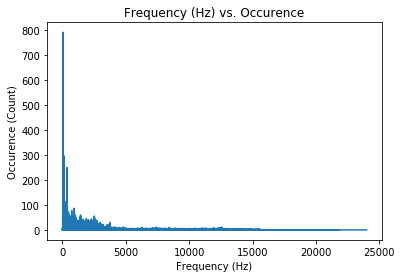

In [79]:
occurence_0, frequencies_0 = plot(data[0][0],data[0][1], True)

In [80]:
occurence_0.argmax(), frequencies_0[9706], occurence_0[occurence_0.argmax()] ## The 50Hz is the fundamental frequency.

(9706, 49.93459781838387, 791.5312547988312)

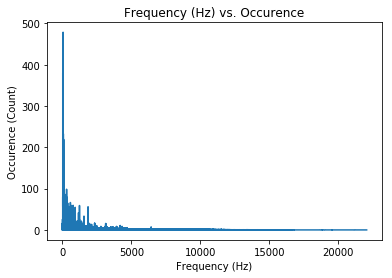

In [81]:
occurence_1, frequencies_1 = plot(data[1][0], data[1][1], True)

In [82]:
occurence_1.argmax(), frequencies_1[occurence_1.argmax()], occurence_1[occurence_1.argmax()] #Fundamental frequency

(14949, 57.37453943777293, 478.4702272066255)

In [83]:
music_files

['../../Music/hypothesis_1/Becky Hill - Sunrise In The East.wav',
 '../../Music/hypothesis_1/Cashmere-CatQuit-ft.-Ariana-GrandeLyrics-_Official-Audio_.wav',
 '../../Music/hypothesis_1/Daya - Insomnia (Lyrics Lyric Video).wav',
 '../../Music/hypothesis_1/Dynoro & Gigi DAgostino - In My Mind.wav',
 '../../Music/hypothesis_1/Maroon-5-Maps-_Lyric-Video_.wav',
 '../../Music/hypothesis_1/Nick-Jonas-_-Nicki-Minaj-Bom-Bidi-Bom-_Lyrics_-_Fifty-Shades-Darker_-HD.wav',
 '../../Music/hypothesis_1/Thinking out Loud.wav']

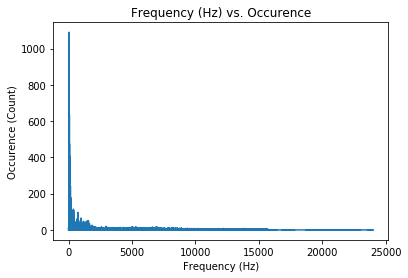

In [84]:
occurence_2, frequencies_2 = plot(data[2][0], data[2][1], True)

In [85]:
occurence_2.argmax(), frequencies_2[occurence_2.argmax()], occurence_2[occurence_2.argmax()] #Fundamental Frequency

(9473, 53.30128641704801, 1090.1268777065009)

In [93]:
frequencies_2[9473*2] / frequencies_2[occurence_2.argmax()],frequencies_2[9473*2], occurence_2[18946] # Second Harmonic

(2.0, 106.60257283409602, 161.64260441587894)

In [94]:
frequencies_2[9473*3] /frequencies_2[occurence_2.argmax()], frequencies_2[9473*3], occurence_2[28419] # Third Harmonic

(3.0, 159.90385925114404, 55.24600306177962)

In [96]:
f

(5.62665326898005, 11.2533065379601)